### AnalysisTask 

- Please make a function that plots the wind turbine   power curve with  "The conventional kernel method" as      described in the paper attached u 
 
- Please use the data in T1.csv  ,  write code in python3 and prepare a jupyter notebook as shown in this article:

### Technology 

#### Pandas, Python, Matplotlib
#### Standerd library imports

In [3]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None

pandas: 0.24.2
pytest: 5.0.1
pip: 19.1.1
setuptools: 41.0.1
Cython: 0.29.12
numpy: 1.16.4
scipy: 1.3.0
pyarrow: None
xarray: None
IPython: 7.6.1
sphinx: 2.1.2
patsy: 0.5.1
dateutil: 2.8.0
pytz: 2019.1
blosc: None
bottleneck: 1.2.1
tables: 3.5.2
numexpr: 2.6.9
feather: None
matplotlib: 3.1.0
openpyxl: 2.6.2
xlrd: 1.2.0
xlwt: 1.3.0
xlsxwriter: 1.1.8
lxml.etree: 4.3.4
bs4: 4.7.1
html5lib: 1.0.1
sqlalchemy: 1.3.5
pymysql: None
psycopg2: 2.7.6.1 (dt dec pq3 ext lo64)
jinja2: 2.10.1
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None
gcsfs: None


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
from IPython.display import IFrame, display
from scipy import stats
import matplotlib.patches as mpatches

In [4]:
IFrame("lee2014.pdf", width=900, height=300)



In [5]:
df = pd.read_csv("T1.csv")# load csv data

In [6]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [7]:
df.dtypes

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

In [8]:
df.shape

(50530, 5)

In [9]:
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [10]:
df.isnull().tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,False,False,False,False,False
50526,False,False,False,False,False
50527,False,False,False,False,False
50528,False,False,False,False,False
50529,False,False,False,False,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
Date/Time                        50530 non-null object
LV ActivePower (kW)              50530 non-null float64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction (°)               50530 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [12]:
df.isnull().sum(axis=0)

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [13]:
df.describe()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


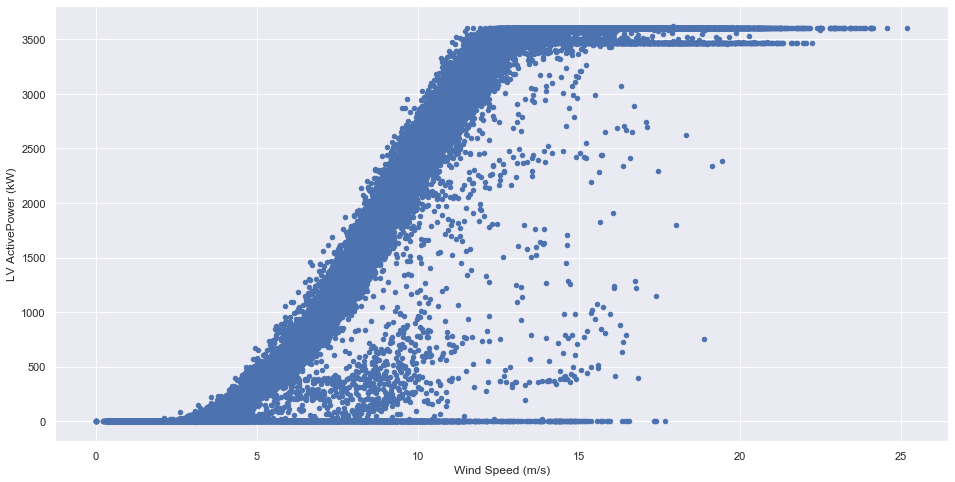

In [14]:
# just to check the plot, how does it look

df.plot(kind='scatter',x='Wind Speed (m/s)', y='LV ActivePower (kW)',figsize=(16,8))

In [15]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [16]:
df.columns.values

array(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype=object)


To show enitre dataframe in plot

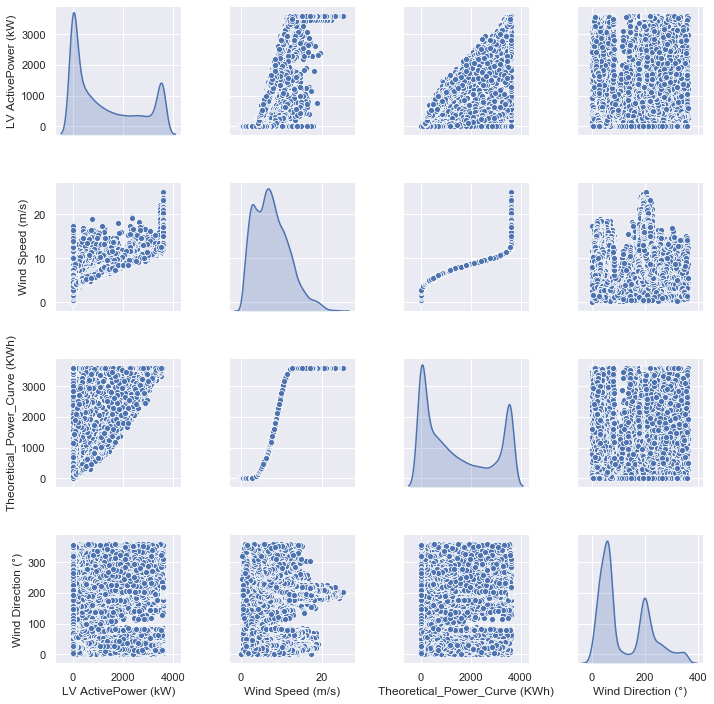

In [17]:
sns.pairplot(df[['Date/Time','LV ActivePower (kW)','Wind Speed (m/s)','Theoretical_Power_Curve (KWh)','Wind Direction (°)']], diag_kind="kde")




#### Gaussian Distribution

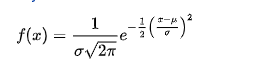

In [18]:
from IPython.display import Image # add image file of formula
Image("1.png", width=900, unconfined=True)

In [19]:
# rename all the columns

df.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)

In [20]:
df.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [21]:
def turbine_p(data): # function for plotable points
    n= len(data) # number of data points
    
    x = np.sort(data) # x data for cumulative distribution function
    y = np.arange(1, n+1)/ n # y data for cumulative distribution function
    
    return x, y

In [22]:
x, y = turbine_p(df['ActivePower(kW)'])# run function on dataframe plotable data points

Text(0, 0.5, 'Cumulative Distribution Function')

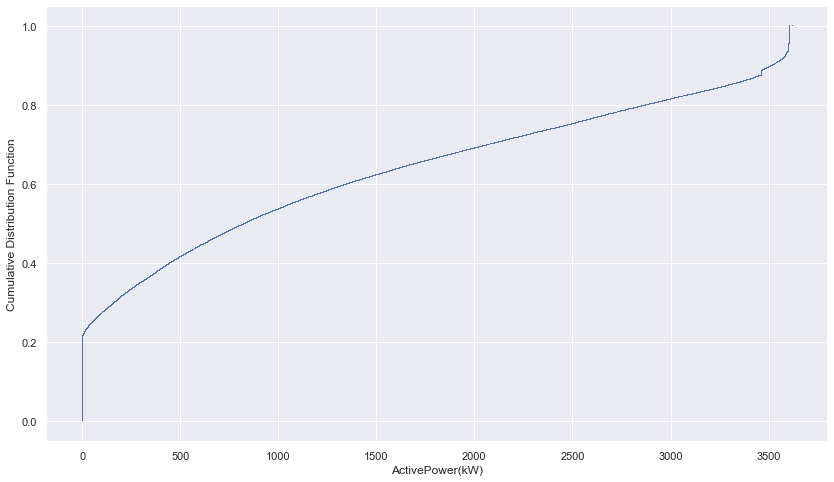

In [23]:
plt.figure(figsize = (14, 8)) # use matplotlib and seaborn to plot data
sns.set()
plt.plot(x, y, marker =',', linestyle='none')
plt.xlabel('ActivePower(kW)')
plt.ylabel('Cumulative Distribution Function')


In [24]:
# Generate 10000 power that follow a normal distribution using mean and the standered devation of the data to scale the range
samples = np.random.normal(np.mean(df["ActivePower(kW)"]), np.std(df["ActivePower(kW)"]), size=10000)

In [25]:
x_theor, y_theor = turbine_p(samples) #  randomized data into x,y pairs using the same function

Text(0, 0.5, 'Cumulative Distribution Function')

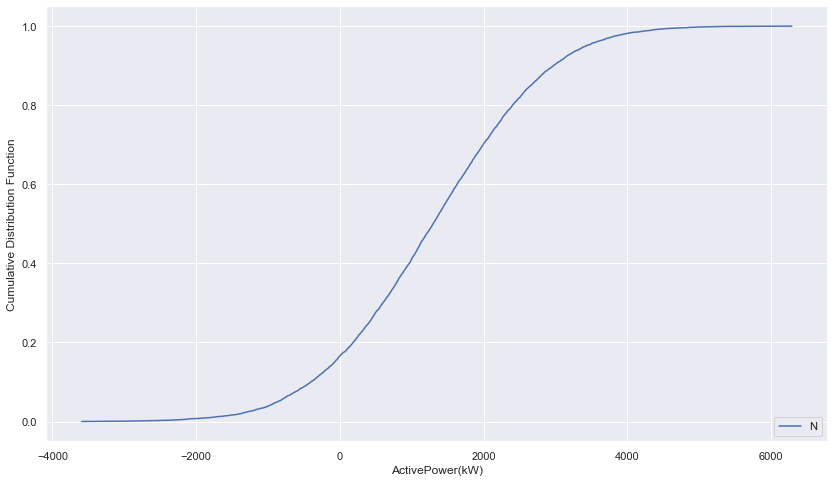

In [26]:
plt.figure(figsize = (14, 8)) # # use matplotlib and seaborn to plot data and add legend

plt.plot(x_theor, y_theor)
plt.legend(('Normal Distribution'), loc='lower right')

plt.xlabel('ActivePower(kW)')
plt.ylabel('Cumulative Distribution Function')

In [27]:
df["Month"]=df["ActivePower(kW)"]+df["WindSpeed(m/s)"]

In [28]:
df.rename(columns={'Date/Time':'Time'},inplace=True) # rename column data/time with time
df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,385.359127
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,459.441362
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,311.592624
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,425.305579
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,386.228637


In [29]:
def loacte_month(M): # function for finding month
    if " 01 " in M:
        return "Jan"
    elif " 02 " in M:
        return "Feb"
    elif " 03 " in M:
        return "March"    
    elif " 04 " in M:
        return "April"    
    elif " 05 " in M:
        return "May"    
    elif " 06 " in M:
        return "June"    
    elif " 07 " in M:
        return "July"    
    elif " 08 " in M:
        return "August"    
    elif " 09 " in M:
        return "Sep"    
    elif " 10 " in M:
        return "Oct"    
    elif " 11 " in M:
        return "Nov"    
    else:
        return "Dec"    

In [30]:
df.Month=df.Time.apply(loacte_month)

In [31]:
df.Month.unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August',
       'Sep', 'Oct', 'Nov', 'Dec'], dtype=object)

In [32]:
df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan


In [33]:
def mean_speed(M): # function for wind speedinterval with 0.5
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if M < i:
            M=i-0.25
            return M

In [34]:
df["mean_WindSpeed"]=df["WindSpeed(m/s)"].apply(mean_speed) # add column mean_windspeed by using mean_speed function

In [35]:
df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5


In [36]:
def mean_direction(D): # function for creating wind direction for 30 intervals
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if D < i:
            D=i-15
            if D==360:
                return 0
            else:
                return D

In [37]:
df["mean_Direction"]=df["Wind_Direction"].apply(mean_direction) #create a nwe column as mean_direction

In [38]:
df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270


In [39]:
def loacte_wind__direction(D): # create function for win direction with alphabet letters
    if D==0:
        return "N"
    if D==30:
        return "NNE"
    if D==60:
        return "NEE" 
    if D==90:
        return "E" 
    if D==120:
        return "SEE" 
    if D==150:
        return "SSE" 
    if D==180:
        return "S" 
    if D==210:
        return "SSW" 
    if D==240:
        return "SWW" 
    if D==270:
        return "W" 
    if D==300:
        return "NWW" 
    if D==330:
        return "NNW"

In [40]:
df["Direction"]=df["mean_Direction"].apply(loacte_wind__direction) # add a new column as direction with loacte_wind__direction function

In [41]:
df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [42]:
len(df["WindSpeed(m/s)"][(df["WindSpeed(m/s)"]>3.5) & (df["WindSpeed(m/s)"]<=25)]) # value count of wind speed between 3.5 and 25



40634

In [43]:
df["WindSpeed(m/s)"][df["WindSpeed(m/s)"]>25].value_counts() # value count which is begger than 25

25.206011    1
Name: WindSpeed(m/s), dtype: int64

In [44]:
df1=df[(df["WindSpeed(m/s)"]>3.5) & (df["WindSpeed(m/s)"]<=25.5)]# delete the data that wind speed is maller than 3.5 and bigger than 25.5

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40635 entries, 0 to 50529
Data columns (total 9 columns):
Time                             40635 non-null object
ActivePower(kW)                  40635 non-null float64
WindSpeed(m/s)                   40635 non-null float64
Theoretical_Power_Curve (KWh)    40635 non-null float64
Wind_Direction                   40635 non-null float64
Month                            40635 non-null object
mean_WindSpeed                   40635 non-null float64
mean_Direction                   40635 non-null int64
Direction                        40635 non-null object
dtypes: float64(5), int64(1), object(3)
memory usage: 3.1+ MB


In [46]:
len(df["ActivePower(kW)"][(df["ActivePower(kW)"]==0)&(df["WindSpeed(m/s)"]>3.5)])# value count where wind speed is bigger than 3.5 and active power is zero

2217

In [47]:
df2=df1[((df1["ActivePower(kW)"]!=0)&(df1["WindSpeed(m/s)"]>3.5)) | (df1["WindSpeed(m/s)"]<=3.5)] # remove datas where wind speed is begger than 3.5 and active power is zero

In [48]:
len(df2["WindSpeed(m/s)"]) # valune counts

38418

In [49]:
df2.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,Jan,5.5,270,W
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,5.5,270,W
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,5.0,270,W
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,Jan,5.5,270,W
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,5.5,270,W


In [50]:
df2["Theoretical_Power_Curve (KWh)"][df2["mean_WindSpeed"]==5.5].mean() # mean value of powercurve(kw) where wind speed is 5.5

472.0957519264287

In [51]:
final_df = df2.sort_values("Time")# calculating losses
final_df["Loss_Value(kW)"]=final_df["Theoretical_Power_Curve (KWh)"]-final_df["ActivePower(kW)"]
final_df["Loss(%)"]=final_df["Loss_Value(kW)"]/final_df["Theoretical_Power_Curve (KWh)"]*100

final_df=final_df.round({'ActivePower(kW)': 2, 'WindSpeed(m/s)': 2, 'Theoretical_Power_Curve (KWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

In [52]:
final_df.head()

,Time,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction,Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,01 01 2018 00:00,380.05,5.31,416.33,259.99,Jan,5.5,270,W,36.28,8.71
1,01 01 2018 00:10,453.77,5.67,519.92,268.64,Jan,5.5,270,W,66.15,12.72
2,01 01 2018 00:20,306.38,5.22,390.90,272.56,Jan,5.0,270,W,84.52,21.62
3,01 01 2018 00:30,419.65,5.66,516.13,271.26,Jan,5.5,270,W,96.48,18.69
4,01 01 2018 00:40,380.65,5.58,491.70,265.67,Jan,5.5,270,W,111.05,22.59


In [53]:
DGroup_turbine_speed = final_df.groupby("mean_WindSpeed")# create speed dataframe from data
data_turbine_speed=DGroup_turbine_speed.mean()

data_turbine_speed.drop(columns={"WindSpeed(m/s)","Wind_Direction","mean_Direction"},inplace=True) # remove colums

list_turbine_speed_WS=data_turbine_speed.index.copy() # create wind speed column
data_turbine_speed["WindSpeed(m/s)"]=list_turbine_speed_WS

data_turbine_speed=data_turbine_speed[["WindSpeed(m/s)","ActivePower(kW)","Theoretical_Power_Curve (KWh)","Loss_Value(kW)","Loss(%)"]] # change the place of the column

data_turbine_speed["Index"]=list(range(1,len(data_turbine_speed.index)+1)) # change index number
data_turbine_speed.set_index("Index",inplace=True)
del data_turbine_speed.index.name

# round values to 2 digit
data_turbine_speed=data_turbine_speed.round({"WindSpeed(m/s)": 1, 'ActivePower(kW)': 2, 'Theoretical_Power_Curve (KWh)': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

# create a count column which shows the number of wind speed
data_turbine_speed["count"]=[len(final_df["mean_WindSpeed"][final_df["mean_WindSpeed"]==i]) 
                        for i in data_turbine_speed["WindSpeed(m/s)"]]



In [54]:
data_turbine_speed

,WindSpeed(m/s),ActivePower(kW),Theoretical_Power_Curve (KWh),Loss_Value(kW),Loss(%),count
1,3.5,51.68,68.61,16.94,24.14,675
2,4.0,98.33,127.75,29.42,23.26,1736
3,4.5,183.96,222.48,38.52,17.44,1794
4,5.0,285.47,336.32,50.86,15.24,1725
5,5.5,402.30,472.10,69.80,14.84,2012
6,6.0,546.76,627.10,80.34,12.84,2216
7,6.5,713.07,807.67,94.60,11.76,2274
8,7.0,902.86,1015.80,112.94,11.16,2320
9,7.5,1122.43,1256.94,134.51,10.72,2254
10,8.0,1364.42,1529.65,165.23,10.78,2141


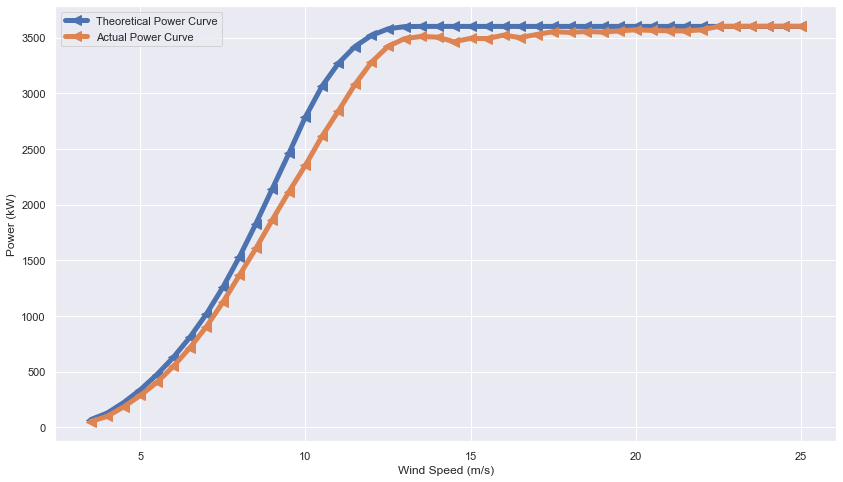

In [55]:
def Graph_Wind_Turbine(): # ploting power graph of the wind turbine
    fig = plt.figure(figsize=(14,8))
    plt.plot(data_turbine_speed["WindSpeed(m/s)"],data_turbine_speed["Theoretical_Power_Curve (KWh)"],label="Theoretical Power Curve",
             marker="<",markersize=10,linewidth = 5)
    plt.plot(data_turbine_speed["WindSpeed(m/s)"],data_turbine_speed["ActivePower(kW)"],label="Actual Power Curve",
             marker="<",markersize=10,linewidth = 5)
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.legend()
    plt.show()

        
Graph_Wind_Turbine()